<a href="https://colab.research.google.com/github/vijaykumarharakuni/mllearning/blob/main/Clustering_algos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Customer segmentation using K-means clustering


In [ ]:
# load the dataset
data=pd.read_csv('Mall_customers.csv')
data


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
# create X
X=data.iloc[:,3:]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [ ]:
# Apply k-means algo , number of clusters
# Elbow method

In [ ]:
import warnings
warnings.filterwarnings('ignore')

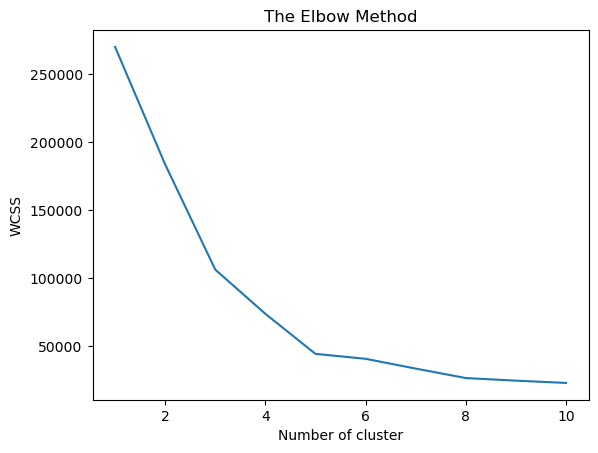

In [ ]:
from sklearn.cluster import KMed
wcss=[]
for i in range(1,11):
    model=KMeans(n_clusters=i,random_state=42)
    model.fit(X)
    wcss.append(model.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.show()

In [ ]:
wcss

[269981.28,
 183653.32894736843,
 106348.37306211122,
 73880.64496247195,
 44448.4554479337,
 40825.16946386947,
 33642.57922077923,
 26686.83778518779,
 24766.471609793443,
 23103.122085983916]

In [ ]:
# Apply K-means Algo
model=KMeans(n_clusters=5,random_state=42)
y_pred=model.fit_predict(X)
print(y_pred)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [ ]:
print(model.cluster_centers_)

[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]


In [ ]:
# Number of cust in each cluster
pred_df=pd.DataFrame(y_pred.tolist())
pred_df.value_counts()

0    81
1    39
3    35
4    23
2    22
dtype: int64

In [ ]:
data['Cluster_Num']=y_pred

In [ ]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_Num
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,3
197,198,Male,32,126,74,1
198,199,Male,32,137,18,3


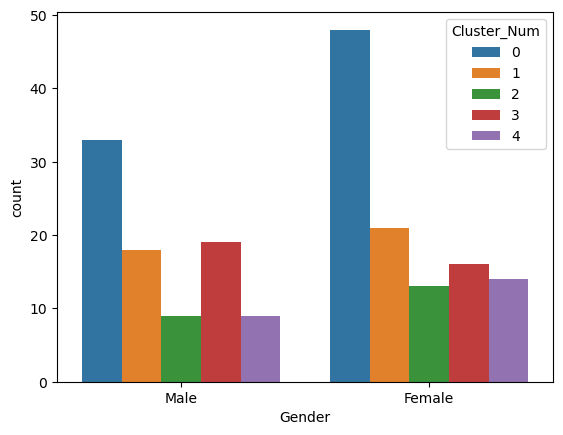

In [ ]:
sns.countplot(x='Gender', hue='Cluster_Num', data=data)
plt.show()

In [ ]:
data[(data['Spending Score (1-100)'] > 40)]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_Num
1,2,Male,21,15,81,2
3,4,Female,23,16,77,2
5,6,Female,22,17,76,2
7,8,Female,23,18,94,2
9,10,Female,30,19,72,2
...,...,...,...,...,...,...
191,192,Female,32,103,69,1
193,194,Female,38,113,91,1
195,196,Female,35,120,79,1
197,198,Male,32,126,74,1


In [ ]:
# cond selection
data[(data['Gender']=='Male') & (data['Cluster_Num']==1)]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_Num
123,124,Male,39,69,91,1
127,128,Male,40,71,95,1
129,130,Male,38,71,75,1
131,132,Male,39,71,75,1
137,138,Male,32,73,73,1
141,142,Male,32,75,93,1
145,146,Male,28,77,97,1
149,150,Male,34,78,90,1
151,152,Male,39,78,88,1
169,170,Male,32,87,63,1


In [ ]:
# visualize the clusters
df=pd.read_csv('Mall_customers.csv')
X=df.iloc[:,3:].values

In [ ]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [ ]:
model.labels_

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

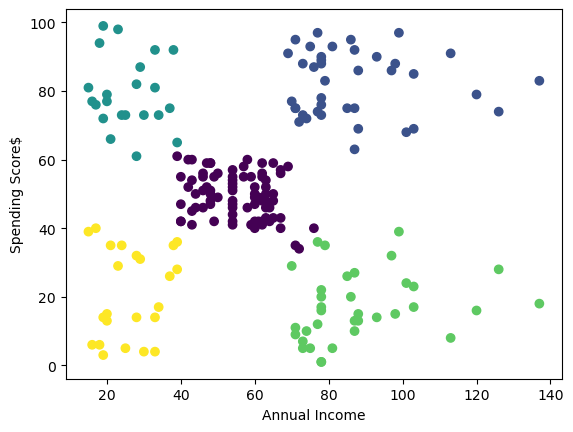

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y_pred)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score$')
plt.show()

In [ ]:
y_kmeans=model.fit_predict(X)

In [ ]:
model.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

In [ ]:
model.cluster_centers_[:, 0]

array([55.2962963 , 86.53846154, 25.72727273, 88.2       , 26.30434783])

In [ ]:
model.cluster_centers_[:, 1]

array([49.51851852, 82.12820513, 79.36363636, 17.11428571, 20.91304348])

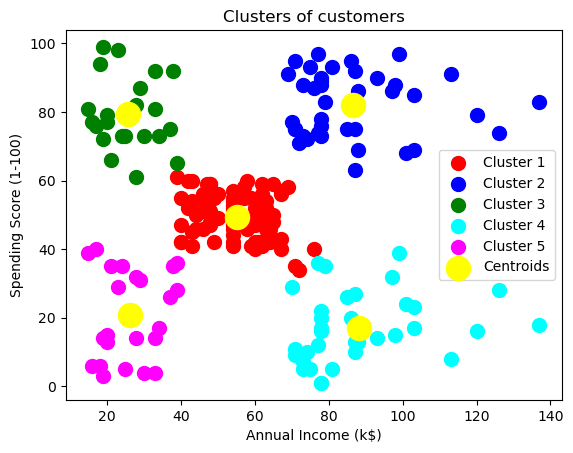

In [ ]:
y_kmeans=model.fit_predict(X)
# Visualize the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [ ]:
# print score
from sklearn.metrics import silhouette_score
score=silhouette_score(X,y_pred)
print(score)

0.553931997444648


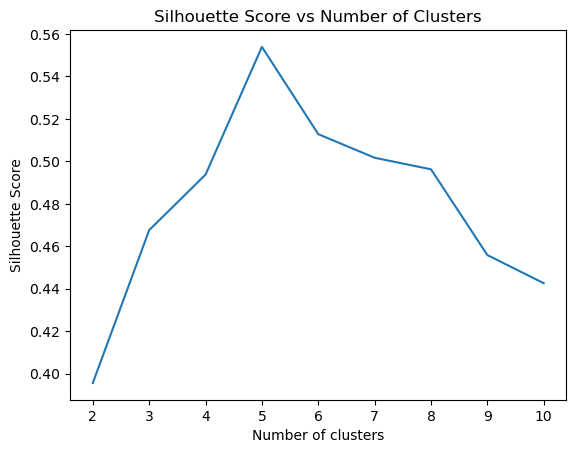

In [ ]:
silhouette_scores = []
for i in range(2, 11):
    model = KMeans(n_clusters=i, random_state=42)
    model.fit(X)
    silhouette_scores.append(silhouette_score(X, model.labels_))

plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
# Advantage-
1. simple & easy to implement
2. used for basic clustering tasks
3. Scalability--large dataset
4. Performs well equal size data

# cons
1. need k predefined clusters
2. Senstitive to outlier
3. started random centroid

# Apply Hierarchical Clustering

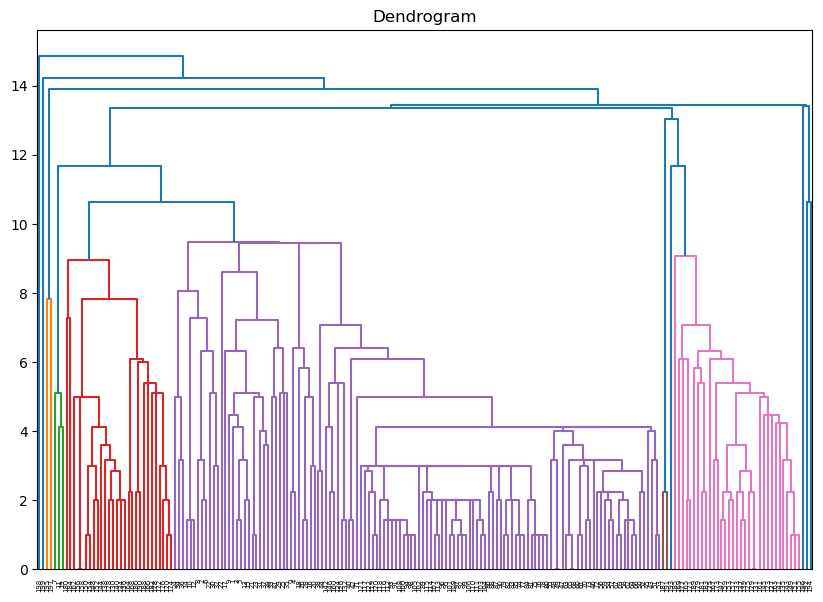

In [ ]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,7))
plt.title('Dendrogram')
dend=sch.dendrogram(sch.linkage(X,method='single'))
plt.show()

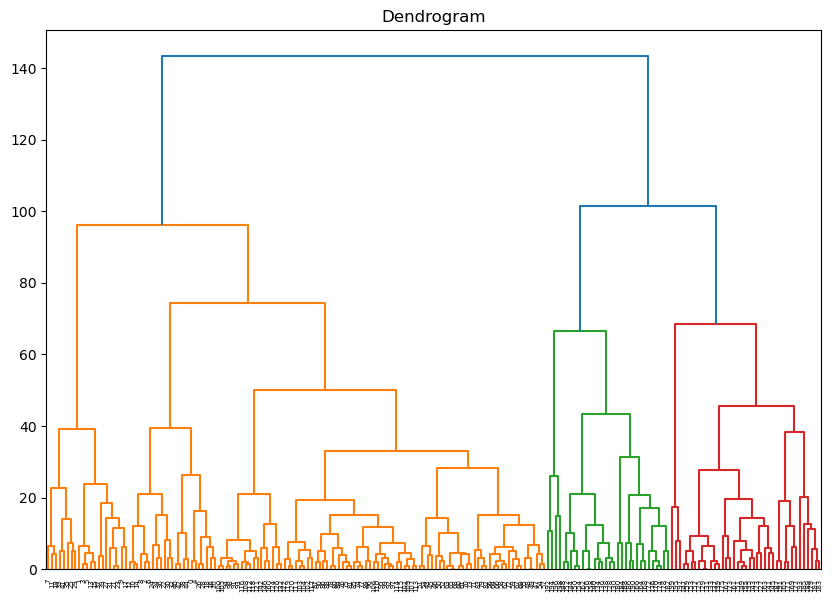

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Dendrogram')
dend=sch.dendrogram(sch.linkage(X,method='complete'))
plt.show()

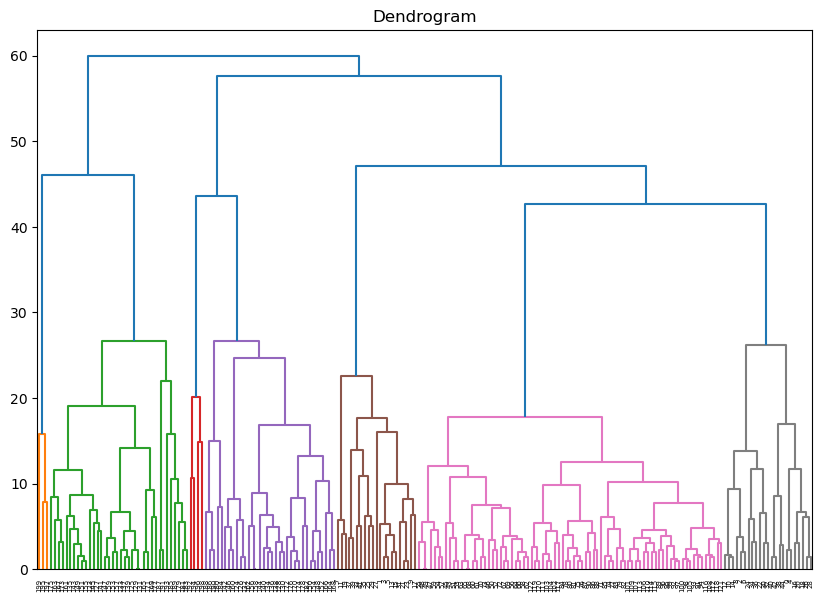

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Dendrogram')
dend=sch.dendrogram(sch.linkage(X,method='average'))
plt.show()

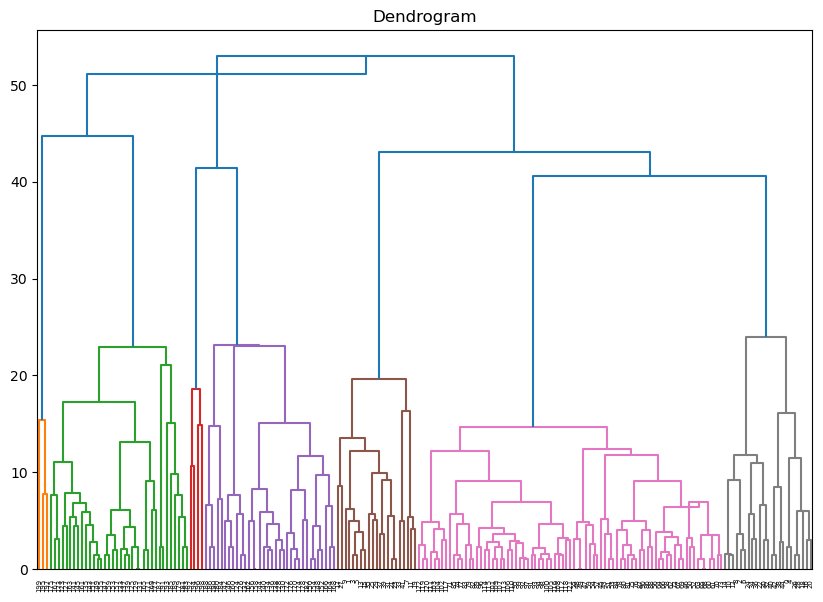

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Dendrogram')
dend=sch.dendrogram(sch.linkage(X,method='centroid'))
plt.show()

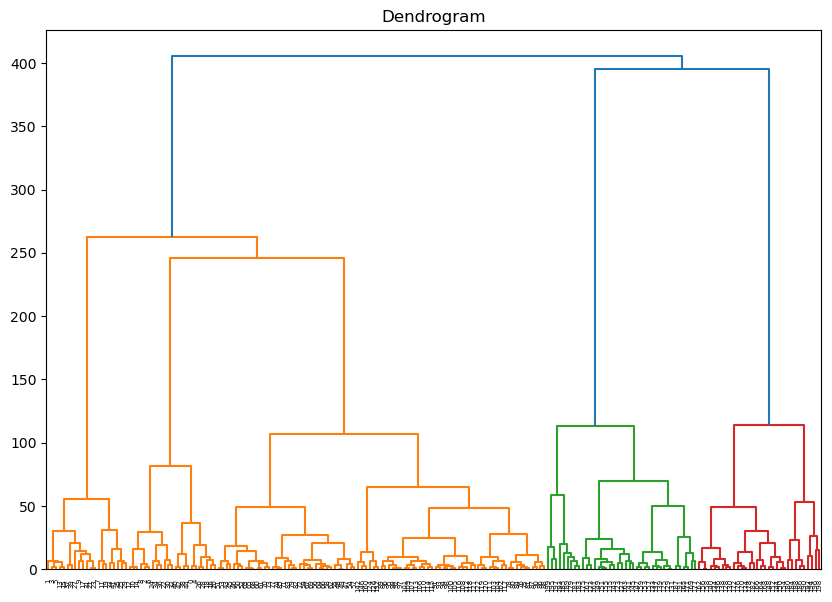

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Dendrogram')
dend=sch.dendrogram(sch.linkage(X,method='ward'))
plt.show()

In [ ]:
# perform clustering
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(n_clusters=5,linkage='ward')
labels=model.fit_predict(X)
labels

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

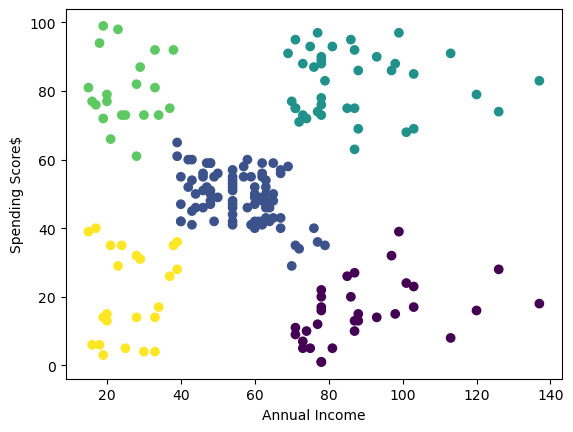

In [ ]:
plt.scatter(X[:,0],X[:,1],c=labels)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score$')
plt.show()

# DBSCAN--Density based Spatial Clustering of Applications with Noise
Group the data points that arec close to each other based on distance measurement

How DBSCAN works
1. Core points--A point is core point if at least min_samples are within one group
2. Border Points-A point is border if it is within the eps of a core point but has fewer
than min_samples points within eps.
3 Noise point- A point which is noise if it is neither a core nor a border point.
4. cluster formation- connect core points and their directly reachable points.




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Define dataset
X = np.array([
    [1.0, 1.0], [1.2, 1.1], [1.1, 1.3],
    [8.0, 8.0], [8.2, 8.1], [7.9, 7.8],
    [2.5, 2.4]
])

In [ ]:
X

array([[1. , 1. ],
       [1.2, 1.1],
       [1.1, 1.3],
       [8. , 8. ],
       [8.2, 8.1],
       [7.9, 7.8],
       [2.5, 2.4]])

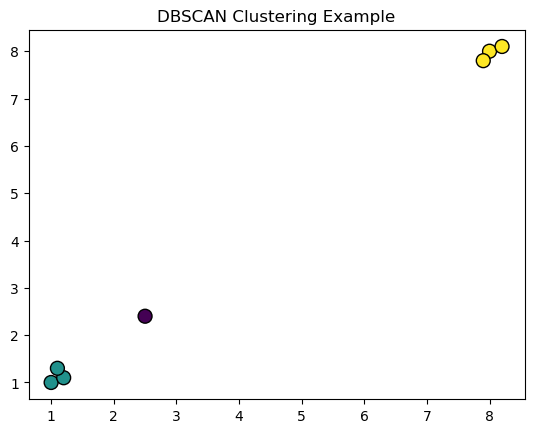

In [ ]:
# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=2)
labels = dbscan.fit_predict(X)

# Plot results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=100, edgecolors='k')
plt.title("DBSCAN Clustering Example")
plt.show()


In [ ]:
labels

array([ 0,  0,  0,  1,  1,  1, -1], dtype=int64)

In [ ]:
X

array([[1. , 1. ],
       [1.2, 1.1],
       [1.1, 1.3],
       [8. , 8. ],
       [8.2, 8.1],
       [7.9, 7.8],
       [2.5, 2.4]])

In [ ]:
Application -- Dimention Reduction


csv - num of col

text data

document classification--

text data